# Análisis de un negocio de retail

## El objetivo es analizar la evolución de las ventas de un negocio, así como la proporción que aporta cada vendedor al negocio

### 1.- Importar la base

In [1]:
# Importamos librerías
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
#Cargamos la base de datos
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\Análisis de datos con jupyther notebook\\Módulos\\## Módulo ## - Comercializadora\\Facturación.xlsx'
df=pd.read_excel(path)

In [3]:
df

,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor
0,FACT2000,2020-01-06,2020-01-30,208,CC208208208,Juan,163.087778,220.705333,218.825386,0.0225
1,FACT2001,2020-01-07,2020-02-19,45,CC454545,Juan,947.945333,1181.498667,1166.952107,0.0150
2,FACT2002,2020-01-08,2020-02-17,268,CC268268268,Juan,4.201185,13.438222,12.766284,0.0225
3,FACT2003,2020-01-08,2020-02-07,157,CC157157157,Juan,86.481778,99.466667,99.466667,0.0125
4,FACT2004,2020-01-09,NaT,157,CC157157157,Juan,32.000000,38.666667,NaN,0.0000
...,...,...,...,...,...,...,...,...,...,...
504,FACT2550,2020-06-05,2020-06-02,159,CC159159159,Bety,276.158222,406.222222,406.222222,0.0225
505,FACT2551,2020-06-12,2020-06-15,176,CC176176176,Bety,1138.454179,1560.793778,1554.495120,0.0225
506,FACT2552,2020-06-18,2020-06-22,305,CC305305305,Bety,360.347111,409.920889,416.392000,0.0100
507,FACT2553,2020-06-19,2020-06-18,305,CC305305305,Bety,382.431461,453.180889,223.278073,0.0125


In [4]:
df.dtypes

Factura                        object
Fecha de Emision       datetime64[ns]
Fecha de Pago          datetime64[ns]
No. cliente                     int64
Cliente                        object
Vendedor                       object
Costo                         float64
Importe Factura               float64
Importe Pagado                float64
% Comision Vendedor           float64
dtype: object

### 2.- Realizamos los primeros cálculos para nuestro análisis y limpiamos la base

In [5]:
# Agregamos el mes y el año de la fecha de pago


In [6]:
df.sample(2)

,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor,Año,Mes
504,FACT2550,2020-06-05,2020-06-02,159,CC159159159,Bety,276.158222,406.222222,406.222222,0.0225,2020.0,6.0
252,FACT2276,2020-02-26,2020-04-06,117,CC117117117,Claudia,18.460000,20.946667,20.946667,0.0100,2020.0,4.0


In [7]:
# Revisamos que no tengamos valores vacíos


Factura                 0
Fecha de Emision        0
Fecha de Pago          59
No. cliente             0
Cliente                 1
Vendedor                0
Costo                   0
Importe Factura         0
Importe Pagado         59
% Comision Vendedor     0
Año                    59
Mes                    59
dtype: int64

In [8]:
# Reemplazamos los valores vacíos por 0's
df['Año'].replace(np.nan,0,inplace=True)
df['Mes'].replace(np.nan,0,inplace=True)
df['Importe Pagado'].replace(np.nan,0,inplace=True)
df['Cliente'].replace(np.nan,0,inplace=True)

In [10]:
# Creamos una columna que se llame status para identificar aquellas facturas que ya se pagaron y aquellas que se emitieron pero no se han pagado


In [11]:
df

,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor,Año,Mes,Status
0,FACT2000,2020-01-06,2020-01-30,208,CC208208208,Juan,163.087778,220.705333,218.825386,0.0225,2020.0,1.0,Pagada
1,FACT2001,2020-01-07,2020-02-19,45,CC454545,Juan,947.945333,1181.498667,1166.952107,0.0150,2020.0,2.0,Pagada
2,FACT2002,2020-01-08,2020-02-17,268,CC268268268,Juan,4.201185,13.438222,12.766284,0.0225,2020.0,2.0,Pagada
3,FACT2003,2020-01-08,2020-02-07,157,CC157157157,Juan,86.481778,99.466667,99.466667,0.0125,2020.0,2.0,Pagada
4,FACT2004,2020-01-09,NaT,157,CC157157157,Juan,32.000000,38.666667,0.000000,0.0000,0.0,0.0,Emitida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,FACT2550,2020-06-05,2020-06-02,159,CC159159159,Bety,276.158222,406.222222,406.222222,0.0225,2020.0,6.0,Pagada
505,FACT2551,2020-06-12,2020-06-15,176,CC176176176,Bety,1138.454179,1560.793778,1554.495120,0.0225,2020.0,6.0,Pagada
506,FACT2552,2020-06-18,2020-06-22,305,CC305305305,Bety,360.347111,409.920889,416.392000,0.0100,2020.0,6.0,Pagada
507,FACT2553,2020-06-19,2020-06-18,305,CC305305305,Bety,382.431461,453.180889,223.278073,0.0125,2020.0,6.0,Pagada


In [12]:
# Para aquellas facturas pagadas calcularemos la utilidad de la venta
for ind, row in df.iterrows():
    if df.loc[ind,'Status']=='Pagada':
        df.loc[ind,'Utilidad']=df.loc[ind,'Importe Pagado']/df.loc[ind,'Costo']-1
    else:
        df.loc[ind,'Utilidad']=0

In [13]:
df

,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor,Año,Mes,Status,Utilidad
0,FACT2000,2020-01-06,2020-01-30,208,CC208208208,Juan,163.087778,220.705333,218.825386,0.0225,2020.0,1.0,Pagada,0.341764
1,FACT2001,2020-01-07,2020-02-19,45,CC454545,Juan,947.945333,1181.498667,1166.952107,0.0150,2020.0,2.0,Pagada,0.231033
2,FACT2002,2020-01-08,2020-02-17,268,CC268268268,Juan,4.201185,13.438222,12.766284,0.0225,2020.0,2.0,Pagada,2.038734
3,FACT2003,2020-01-08,2020-02-07,157,CC157157157,Juan,86.481778,99.466667,99.466667,0.0125,2020.0,2.0,Pagada,0.150146
4,FACT2004,2020-01-09,NaT,157,CC157157157,Juan,32.000000,38.666667,0.000000,0.0000,0.0,0.0,Emitida,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,FACT2550,2020-06-05,2020-06-02,159,CC159159159,Bety,276.158222,406.222222,406.222222,0.0225,2020.0,6.0,Pagada,0.470976
505,FACT2551,2020-06-12,2020-06-15,176,CC176176176,Bety,1138.454179,1560.793778,1554.495120,0.0225,2020.0,6.0,Pagada,0.365444
506,FACT2552,2020-06-18,2020-06-22,305,CC305305305,Bety,360.347111,409.920889,416.392000,0.0100,2020.0,6.0,Pagada,0.155530
507,FACT2553,2020-06-19,2020-06-18,305,CC305305305,Bety,382.431461,453.180889,223.278073,0.0125,2020.0,6.0,Pagada,-0.416162


In [14]:
# Para aquellas facturas pagadas, calcularemos el tiempo que se tardaron en pagarlas después de haberlas emitido
for ind, row in df.iterrows():
    if df.loc[ind,'Status']=='Pagada':
        df.loc[ind,'Dias']=df.loc[ind,'Fecha de Pago']-df.loc[ind,'Fecha de Emision']
    else:
        df.loc[ind,'Dias']=0

In [15]:
df

,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor,Año,Mes,Status,Utilidad,Dias
0,FACT2000,2020-01-06,2020-01-30,208,CC208208208,Juan,163.087778,220.705333,218.825386,0.0225,2020.0,1.0,Pagada,0.341764,24 days 00:00:00
1,FACT2001,2020-01-07,2020-02-19,45,CC454545,Juan,947.945333,1181.498667,1166.952107,0.0150,2020.0,2.0,Pagada,0.231033,43 days 00:00:00
2,FACT2002,2020-01-08,2020-02-17,268,CC268268268,Juan,4.201185,13.438222,12.766284,0.0225,2020.0,2.0,Pagada,2.038734,40 days 00:00:00
3,FACT2003,2020-01-08,2020-02-07,157,CC157157157,Juan,86.481778,99.466667,99.466667,0.0125,2020.0,2.0,Pagada,0.150146,30 days 00:00:00
4,FACT2004,2020-01-09,NaT,157,CC157157157,Juan,32.000000,38.666667,0.000000,0.0000,0.0,0.0,Emitida,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,FACT2550,2020-06-05,2020-06-02,159,CC159159159,Bety,276.158222,406.222222,406.222222,0.0225,2020.0,6.0,Pagada,0.470976,-3 days +00:00:00
505,FACT2551,2020-06-12,2020-06-15,176,CC176176176,Bety,1138.454179,1560.793778,1554.495120,0.0225,2020.0,6.0,Pagada,0.365444,3 days 00:00:00
506,FACT2552,2020-06-18,2020-06-22,305,CC305305305,Bety,360.347111,409.920889,416.392000,0.0100,2020.0,6.0,Pagada,0.155530,4 days 00:00:00
507,FACT2553,2020-06-19,2020-06-18,305,CC305305305,Bety,382.431461,453.180889,223.278073,0.0125,2020.0,6.0,Pagada,-0.416162,-1 days +00:00:00


### 3.- Análisis

In [16]:
# Calculamos las estadísticas descriptivas de las variables


<ipython-input-16-a4b036c0b986>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-16-a4b036c0b986>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor,Año,Mes,Status,Utilidad,Dias
count,509,509,450,509.000000,509,509,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509,509.000000,509.0
unique,509,96,99,NaN,70,3,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,100.0
top,FACT2526,2020-02-24 00:00:00,2020-04-27 00:00:00,NaN,CC242424,Claudia,NaN,NaN,NaN,NaN,NaN,NaN,Pagada,NaN,0.0
freq,1,26,44,NaN,150,273,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN,59.0
first,NaN,2020-01-02 00:00:00,2020-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-06-30 00:00:00,2020-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,224.779961,NaN,NaN,362.625584,467.890891,381.258136,0.012785,1785.854617,3.772102,NaN,0.327419,NaN
std,NaN,NaN,NaN,788.329512,NaN,NaN,623.525407,827.004190,683.509449,0.007775,647.281038,1.836616,NaN,0.913115,NaN
min,NaN,NaN,NaN,17.000000,NaN,NaN,2.100593,3.828000,0.000000,0.000000,0.000000,0.000000,NaN,-0.684107,NaN
25%,NaN,NaN,NaN,24.000000,NaN,NaN,62.746667,79.955556,45.318867,0.010000,2020.000000,3.000000,NaN,0.103259,NaN


#### Dado que nos interesa analizar la facturación que ya ingresó a nuestras cuentas, vamos a analizar únicamente aquellas facturas que ya fueron pagadas

In [17]:
# Filtramos de nuestra base las facturas pagadas


,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor,Año,Mes,Status,Utilidad,Dias
0,FACT2000,2020-01-06,2020-01-30,208,CC208208208,Juan,163.087778,220.705333,218.825386,0.0225,2020.0,1.0,Pagada,0.341764,24 days 00:00:00
1,FACT2001,2020-01-07,2020-02-19,45,CC454545,Juan,947.945333,1181.498667,1166.952107,0.0150,2020.0,2.0,Pagada,0.231033,43 days 00:00:00
2,FACT2002,2020-01-08,2020-02-17,268,CC268268268,Juan,4.201185,13.438222,12.766284,0.0225,2020.0,2.0,Pagada,2.038734,40 days 00:00:00
3,FACT2003,2020-01-08,2020-02-07,157,CC157157157,Juan,86.481778,99.466667,99.466667,0.0125,2020.0,2.0,Pagada,0.150146,30 days 00:00:00
9,FACT2009,2020-01-28,2020-02-28,157,CC157157157,Juan,39.944444,47.777778,47.777778,0.0125,2020.0,2.0,Pagada,0.196106,31 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,FACT2550,2020-06-05,2020-06-02,159,CC159159159,Bety,276.158222,406.222222,406.222222,0.0225,2020.0,6.0,Pagada,0.470976,-3 days +00:00:00
505,FACT2551,2020-06-12,2020-06-15,176,CC176176176,Bety,1138.454179,1560.793778,1554.495120,0.0225,2020.0,6.0,Pagada,0.365444,3 days 00:00:00
506,FACT2552,2020-06-18,2020-06-22,305,CC305305305,Bety,360.347111,409.920889,416.392000,0.0100,2020.0,6.0,Pagada,0.155530,4 days 00:00:00
507,FACT2553,2020-06-19,2020-06-18,305,CC305305305,Bety,382.431461,453.180889,223.278073,0.0125,2020.0,6.0,Pagada,-0.416162,-1 days +00:00:00


In [18]:
# Agrupamos el importe de las facturas pagadas


,Año,Mes,Importe Pagado
0,2020.0,1.0,1617.943231
1,2020.0,2.0,16587.620785
2,2020.0,3.0,42164.693740
3,2020.0,4.0,52265.054189
4,2020.0,5.0,37693.383626
5,2020.0,6.0,43731.695869


In [19]:
# Agregamos una llave que nos ayudará a unir nuestras bases de datos en el futuro


In [20]:
# Aquí contamos las facturas. ¿Cuántas facturas se pagaron?


,Año,Mes,Importe Pagado
0,2020.0,1.0,7
1,2020.0,2.0,43
2,2020.0,3.0,76
3,2020.0,4.0,112
4,2020.0,5.0,121
5,2020.0,6.0,91


In [21]:
# Generamos la llave para unirla con la base anterior


In [22]:
# Unimos ambas bases


,Año_x,Mes_x,Importe Pagado_x,Key,Año_y,Mes_y,Importe Pagado_y
0,2020.0,1.0,1617.943231,2020.0-1.0,2020.0,1.0,7
1,2020.0,2.0,16587.620785,2020.0-2.0,2020.0,2.0,43
2,2020.0,3.0,42164.693740,2020.0-3.0,2020.0,3.0,76
3,2020.0,4.0,52265.054189,2020.0-4.0,2020.0,4.0,112
4,2020.0,5.0,37693.383626,2020.0-5.0,2020.0,5.0,121
5,2020.0,6.0,43731.695869,2020.0-6.0,2020.0,6.0,91


In [23]:
# Limpiamos nuestra base
df2=df2[['Año_x','Mes_x','Importe Pagado_x','Importe Pagado_y']]

In [24]:
# Cambiamos los nombres de las columnas para que sea una base limpia
df2['Año']=df2['Año_x']
df2['Mes']=df2['Mes_x']
df2['Monto']=df2['Importe Pagado_x']
df2['Facturas']=df2['Importe Pagado_y']

<ipython-input-24-27ed670c3287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Año']=df2['Año_x']
<ipython-input-24-27ed670c3287>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mes']=df2['Mes_x']


In [25]:
# Eliminamos las columnas que no necesitamos
df2.drop('Año_x',axis=1,inplace=True)
df2.drop('Mes_x',axis=1,inplace=True)
df2.drop('Importe Pagado_x',axis=1,inplace=True)
df2.drop('Importe Pagado_y',axis=1,inplace=True)

In [26]:
df2

,Año,Mes,Monto,Facturas
0,2020.0,1.0,1617.943231,7
1,2020.0,2.0,16587.620785,43
2,2020.0,3.0,42164.693740,76
3,2020.0,4.0,52265.054189,112
4,2020.0,5.0,37693.383626,121
5,2020.0,6.0,43731.695869,91


In [28]:
#Filtramos la base de datos con el monto para poder graficarla


In [29]:
# Le pedimos que el index sea el mes


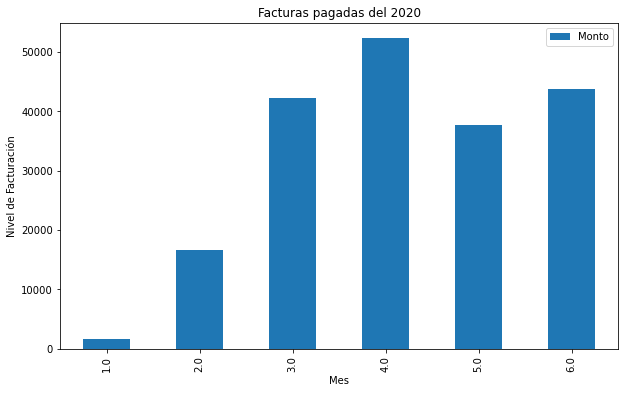

In [30]:
#Graficamos
df2_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Mes') 
plt.ylabel('Nivel de Facturación') 
plt.title('Facturas pagadas del 2020') 

plt.show()

In [31]:
# realizamos los mismos cálculos para graficar el número de facturas
df2_plot2=df2[['Mes','Facturas']]

In [32]:
df2_plot2=df2_plot2.set_index('Mes')

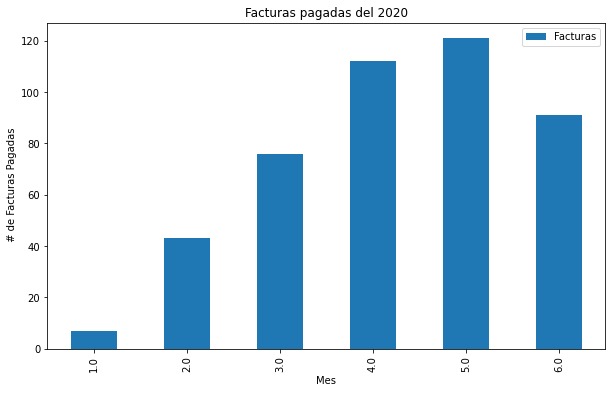

In [33]:
# step 2: plot data
df2_plot2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Mes') # add to x-label to the plot
plt.ylabel(' # de Facturas Pagadas') # add y-label to the plot
plt.title('Facturas pagadas del 2020') # add title to the plot

plt.show()

### 4.- Análisis de vendedores

In [34]:
# Analizaremos las ventas que aportan los vendedores


array(['Juan', 'Claudia', 'Bety'], dtype=object)

In [35]:
# Generamos 3 bases, una para cada vendedor


In [36]:
# Realizamos los cálculos y agrupaciones para Juan


In [37]:
# Creamos la llave para unir las bases agrupadas de Juan


In [38]:
# Juntamos las bases


,Año_x,Mes_x,Importe Pagado_x,Key,Año_y,Mes_y,Importe Pagado_y
0,2020.0,1.0,218.825386,2020.0-1.0,2020.0,1.0,1
1,2020.0,2.0,9200.883575,2020.0-2.0,2020.0,2.0,12
2,2020.0,3.0,5364.761867,2020.0-3.0,2020.0,3.0,13
3,2020.0,4.0,7385.276076,2020.0-4.0,2020.0,4.0,12
4,2020.0,5.0,9944.646866,2020.0-5.0,2020.0,5.0,33
5,2020.0,6.0,9481.027840,2020.0-6.0,2020.0,6.0,15


,Año_x,Mes_x,Importe Pagado_x,Key,Año_y,Mes_y,Importe Pagado_y,Año,Mes,Utilidad
0,2020.0,1.0,218.825386,2020.0-1.0,2020.0,1.0,1,2020.0,1.0,0.341764
1,2020.0,2.0,9200.883575,2020.0-2.0,2020.0,2.0,12,2020.0,2.0,0.302230
2,2020.0,3.0,5364.761867,2020.0-3.0,2020.0,3.0,13,2020.0,3.0,0.748423
3,2020.0,4.0,7385.276076,2020.0-4.0,2020.0,4.0,12,2020.0,4.0,0.863068
4,2020.0,5.0,9944.646866,2020.0-5.0,2020.0,5.0,33,2020.0,5.0,0.100670
5,2020.0,6.0,9481.027840,2020.0-6.0,2020.0,6.0,15,2020.0,6.0,0.681873


In [40]:
# limpiamos la base de Juan
df_juan=df_juan[['Año_x','Mes_x','Importe Pagado_x','Importe Pagado_y','Utilidad']]

In [41]:
df_juan['Año']=df_juan['Año_x']
df_juan['Mes']=df_juan['Mes_x']
df_juan['Monto']=df_juan['Importe Pagado_x']
df_juan['Facturas']=df_juan['Importe Pagado_y']

<ipython-input-41-ad84cbb6ac8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juan['Año']=df_juan['Año_x']
<ipython-input-41-ad84cbb6ac8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juan['Mes']=df_juan['Mes_x']
<ipython-input-41-ad84cbb6ac8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [42]:
df_juan.drop('Año_x',axis=1,inplace=True)
df_juan.drop('Mes_x',axis=1,inplace=True)
df_juan.drop('Importe Pagado_x',axis=1,inplace=True)
df_juan.drop('Importe Pagado_y',axis=1,inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
# Base final de Juan
df_juan

,Utilidad,Año,Mes,Monto,Facturas
0,0.341764,2020.0,1.0,218.825386,1
1,0.302230,2020.0,2.0,9200.883575,12
2,0.748423,2020.0,3.0,5364.761867,13
3,0.863068,2020.0,4.0,7385.276076,12
4,0.100670,2020.0,5.0,9944.646866,33
5,0.681873,2020.0,6.0,9481.027840,15


In [46]:
# Realizamos el mismo proceso para la base de Claudia
df_claudia_sum=df_claudia.groupby(['Año','Mes'],as_index=False)['Importe Pagado'].sum()
df_claudia_count=df_claudia.groupby(['Año','Mes'],as_index=False)['Importe Pagado'].count()
df_claudia_mean=df_juan.groupby(['Año','Mes'],as_index=False)['Utilidad'].mean()

In [47]:
df_claudia_sum['Key']=df_claudia_sum['Año'].astype(str)+'-'+df_claudia_sum['Mes'].astype(str)
df_claudia_count['Key']=df_claudia_count['Año'].astype(str)+'-'+df_claudia_count['Mes'].astype(str)
df_claudia_mean['Key']=df_claudia_mean['Año'].astype(str)+'-'+df_claudia_mean['Mes'].astype(str)

In [48]:
df_claudia=pd.merge(df_claudia_sum,df_claudia_count, on='Key', how='left')
df_claudia

,Año_x,Mes_x,Importe Pagado_x,Key,Año_y,Mes_y,Importe Pagado_y
0,2020.0,1.0,411.126820,2020.0-1.0,2020.0,1.0,2
1,2020.0,2.0,839.304215,2020.0-2.0,2020.0,2.0,7
2,2020.0,3.0,20436.572768,2020.0-3.0,2020.0,3.0,38
3,2020.0,4.0,34145.253625,2020.0-4.0,2020.0,4.0,78
4,2020.0,5.0,19025.749057,2020.0-5.0,2020.0,5.0,68
5,2020.0,6.0,20455.398743,2020.0-6.0,2020.0,6.0,43


In [49]:
df_claudia=pd.merge(df_claudia,df_claudia_mean, on='Key', how='left')
df_claudia

,Año_x,Mes_x,Importe Pagado_x,Key,Año_y,Mes_y,Importe Pagado_y,Año,Mes,Utilidad
0,2020.0,1.0,411.126820,2020.0-1.0,2020.0,1.0,2,2020.0,1.0,0.341764
1,2020.0,2.0,839.304215,2020.0-2.0,2020.0,2.0,7,2020.0,2.0,0.302230
2,2020.0,3.0,20436.572768,2020.0-3.0,2020.0,3.0,38,2020.0,3.0,0.748423
3,2020.0,4.0,34145.253625,2020.0-4.0,2020.0,4.0,78,2020.0,4.0,0.863068
4,2020.0,5.0,19025.749057,2020.0-5.0,2020.0,5.0,68,2020.0,5.0,0.100670
5,2020.0,6.0,20455.398743,2020.0-6.0,2020.0,6.0,43,2020.0,6.0,0.681873


In [50]:
df_claudia=df_claudia[['Año_x','Mes_x','Importe Pagado_x','Importe Pagado_y','Utilidad']]

In [51]:
df_claudia['Año']=df_claudia['Año_x']
df_claudia['Mes']=df_claudia['Mes_x']
df_claudia['Monto']=df_claudia['Importe Pagado_x']
df_claudia['Facturas']=df_claudia['Importe Pagado_y']

<ipython-input-51-83b803680147>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claudia['Año']=df_claudia['Año_x']
<ipython-input-51-83b803680147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claudia['Mes']=df_claudia['Mes_x']
<ipython-input-51-83b803680147>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [52]:
df_claudia.drop('Año_x',axis=1,inplace=True)
df_claudia.drop('Mes_x',axis=1,inplace=True)
df_claudia.drop('Importe Pagado_x',axis=1,inplace=True)
df_claudia.drop('Importe Pagado_y',axis=1,inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
# Base final de Claudia
df_claudia

,Utilidad,Año,Mes,Monto,Facturas
0,0.341764,2020.0,1.0,411.126820,2
1,0.302230,2020.0,2.0,839.304215,7
2,0.748423,2020.0,3.0,20436.572768,38
3,0.863068,2020.0,4.0,34145.253625,78
4,0.100670,2020.0,5.0,19025.749057,68
5,0.681873,2020.0,6.0,20455.398743,43


In [54]:
#Mismos cálculos para Bety
df_bety_sum=df_bety.groupby(['Año','Mes'],as_index=False)['Importe Pagado'].sum()
df_bety_count=df_bety.groupby(['Año','Mes'],as_index=False)['Importe Pagado'].count()
df_bety_mean=df_bety.groupby(['Año','Mes'],as_index=False)['Utilidad'].mean()

In [55]:
df_bety_sum['Key']=df_bety_sum['Año'].astype(str)+'-'+df_bety_sum['Mes'].astype(str)
df_bety_count['Key']=df_bety_count['Año'].astype(str)+'-'+df_bety_count['Mes'].astype(str)
df_bety_mean['Key']=df_bety_mean['Año'].astype(str)+'-'+df_bety_mean['Mes'].astype(str)

In [56]:
df_bety=pd.merge(df_bety_sum,df_bety_count, on='Key', how='left')
df_bety

,Año_x,Mes_x,Importe Pagado_x,Key,Año_y,Mes_y,Importe Pagado_y
0,2020.0,1.0,987.991025,2020.0-1.0,2020.0,1.0,4
1,2020.0,2.0,6547.432995,2020.0-2.0,2020.0,2.0,24
2,2020.0,3.0,16363.359105,2020.0-3.0,2020.0,3.0,25
3,2020.0,4.0,10734.524488,2020.0-4.0,2020.0,4.0,22
4,2020.0,5.0,8722.987703,2020.0-5.0,2020.0,5.0,20
5,2020.0,6.0,13795.269286,2020.0-6.0,2020.0,6.0,33


In [57]:
df_bety=pd.merge(df_bety,df_bety_mean, on='Key', how='left')
df_bety

,Año_x,Mes_x,Importe Pagado_x,Key,Año_y,Mes_y,Importe Pagado_y,Año,Mes,Utilidad
0,2020.0,1.0,987.991025,2020.0-1.0,2020.0,1.0,4,2020.0,1.0,0.198959
1,2020.0,2.0,6547.432995,2020.0-2.0,2020.0,2.0,24,2020.0,2.0,0.154071
2,2020.0,3.0,16363.359105,2020.0-3.0,2020.0,3.0,25,2020.0,3.0,0.356678
3,2020.0,4.0,10734.524488,2020.0-4.0,2020.0,4.0,22,2020.0,4.0,0.395703
4,2020.0,5.0,8722.987703,2020.0-5.0,2020.0,5.0,20,2020.0,5.0,0.971547
5,2020.0,6.0,13795.269286,2020.0-6.0,2020.0,6.0,33,2020.0,6.0,0.416732


In [58]:
df_bety=df_bety[['Año_x','Mes_x','Importe Pagado_x','Importe Pagado_y','Utilidad']]

In [59]:
df_bety['Año']=df_bety['Año_x']
df_bety['Mes']=df_bety['Mes_x']
df_bety['Monto']=df_bety['Importe Pagado_x']
df_bety['Facturas']=df_bety['Importe Pagado_y']

<ipython-input-59-2534c4f0f2d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bety['Año']=df_bety['Año_x']
<ipython-input-59-2534c4f0f2d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bety['Mes']=df_bety['Mes_x']
<ipython-input-59-2534c4f0f2d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [60]:
df_bety.drop('Año_x',axis=1,inplace=True)
df_bety.drop('Mes_x',axis=1,inplace=True)
df_bety.drop('Importe Pagado_x',axis=1,inplace=True)
df_bety.drop('Importe Pagado_y',axis=1,inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
# Base final de Bety
df_bety

,Utilidad,Año,Mes,Monto,Facturas
0,0.198959,2020.0,1.0,987.991025,4
1,0.154071,2020.0,2.0,6547.432995,24
2,0.356678,2020.0,3.0,16363.359105,25
3,0.395703,2020.0,4.0,10734.524488,22
4,0.971547,2020.0,5.0,8722.987703,20
5,0.416732,2020.0,6.0,13795.269286,33


In [63]:
# Creamos la llave para unir las bases de todos los vendedores


<ipython-input-63-dc4c8942a9c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juan['Key']=df_juan['Año'].astype(str)+'-'+df_juan['Mes'].astype(str)
<ipython-input-63-dc4c8942a9c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claudia['Key']=df_claudia['Año'].astype(str)+'-'+df_claudia['Mes'].astype(str)
<ipython-input-63-dc4c8942a9c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [64]:
#Unimos las bases


In [66]:
df_vend

,Utilidad_x,Año_x,Mes_x,Monto_x,Facturas_x,Key,Utilidad_y,Año_y,Mes_y,Monto_y,Facturas_y,Utilidad,Año,Mes,Monto,Facturas
0,0.341764,2020.0,1.0,218.825386,1,2020.0-1.0,0.341764,2020.0,1.0,411.126820,2,0.198959,2020.0,1.0,987.991025,4
1,0.302230,2020.0,2.0,9200.883575,12,2020.0-2.0,0.302230,2020.0,2.0,839.304215,7,0.154071,2020.0,2.0,6547.432995,24
2,0.748423,2020.0,3.0,5364.761867,13,2020.0-3.0,0.748423,2020.0,3.0,20436.572768,38,0.356678,2020.0,3.0,16363.359105,25
3,0.863068,2020.0,4.0,7385.276076,12,2020.0-4.0,0.863068,2020.0,4.0,34145.253625,78,0.395703,2020.0,4.0,10734.524488,22
4,0.100670,2020.0,5.0,9944.646866,33,2020.0-5.0,0.100670,2020.0,5.0,19025.749057,68,0.971547,2020.0,5.0,8722.987703,20
5,0.681873,2020.0,6.0,9481.027840,15,2020.0-6.0,0.681873,2020.0,6.0,20455.398743,43,0.416732,2020.0,6.0,13795.269286,33


In [68]:
#Comenzamos con la limpieza de la base final de los vendedores
df_vend=df_vend[['Año_x','Mes_x','Monto_x','Facturas_x','Monto_y','Facturas_y','Monto','Facturas','Utilidad_x','Utilidad_y','Utilidad']]

In [69]:
df_vend

,Año_x,Mes_x,Monto_x,Facturas_x,Monto_y,Facturas_y,Monto,Facturas,Utilidad_x,Utilidad_y,Utilidad
0,2020.0,1.0,218.825386,1,411.126820,2,987.991025,4,0.341764,0.341764,0.198959
1,2020.0,2.0,9200.883575,12,839.304215,7,6547.432995,24,0.302230,0.302230,0.154071
2,2020.0,3.0,5364.761867,13,20436.572768,38,16363.359105,25,0.748423,0.748423,0.356678
3,2020.0,4.0,7385.276076,12,34145.253625,78,10734.524488,22,0.863068,0.863068,0.395703
4,2020.0,5.0,9944.646866,33,19025.749057,68,8722.987703,20,0.100670,0.100670,0.971547
5,2020.0,6.0,9481.027840,15,20455.398743,43,13795.269286,33,0.681873,0.681873,0.416732


In [70]:
df_vend['Año']=df_vend['Año_x']
df_vend['Mes']=df_vend['Mes_x']
df_vend['Monto_Juan']=df_vend['Monto_x']
df_vend['Facturas_Juan']=df_vend['Facturas_x']
df_vend['Utilidad_Juan']=df_vend['Utilidad_x']
df_vend['Monto_Claudia']=df_vend['Monto_y']
df_vend['Facturas_Claudia']=df_vend['Facturas_y']
df_vend['Utilidad_Claudia']=df_vend['Utilidad_y']
df_vend['Monto_Bety']=df_vend['Monto']
df_vend['Facturas_Bety']=df_vend['Facturas']
df_vend['Utilidad_Bety']=df_vend['Utilidad']

In [71]:
df_vend

,Año_x,Mes_x,Monto_x,Facturas_x,Monto_y,Facturas_y,Monto,Facturas,Utilidad_x,Utilidad_y,...,Mes,Monto_Juan,Facturas_Juan,Utilidad_Juan,Monto_Claudia,Facturas_Claudia,Utilidad_Claudia,Monto_Bety,Facturas_Bety,Utilidad_Bety
0,2020.0,1.0,218.825386,1,411.126820,2,987.991025,4,0.341764,0.341764,...,1.0,218.825386,1,0.341764,411.126820,2,0.341764,987.991025,4,0.198959
1,2020.0,2.0,9200.883575,12,839.304215,7,6547.432995,24,0.302230,0.302230,...,2.0,9200.883575,12,0.302230,839.304215,7,0.302230,6547.432995,24,0.154071
2,2020.0,3.0,5364.761867,13,20436.572768,38,16363.359105,25,0.748423,0.748423,...,3.0,5364.761867,13,0.748423,20436.572768,38,0.748423,16363.359105,25,0.356678
3,2020.0,4.0,7385.276076,12,34145.253625,78,10734.524488,22,0.863068,0.863068,...,4.0,7385.276076,12,0.863068,34145.253625,78,0.863068,10734.524488,22,0.395703
4,2020.0,5.0,9944.646866,33,19025.749057,68,8722.987703,20,0.100670,0.100670,...,5.0,9944.646866,33,0.100670,19025.749057,68,0.100670,8722.987703,20,0.971547
5,2020.0,6.0,9481.027840,15,20455.398743,43,13795.269286,33,0.681873,0.681873,...,6.0,9481.027840,15,0.681873,20455.398743,43,0.681873,13795.269286,33,0.416732


In [72]:
df_vend.drop('Año_x',axis=1,inplace=True)
df_vend.drop('Mes_x',axis=1,inplace=True)
df_vend.drop('Monto_x',axis=1,inplace=True)
df_vend.drop('Facturas_x',axis=1,inplace=True)
df_vend.drop('Utilidad_x',axis=1,inplace=True)
df_vend.drop('Monto_y',axis=1,inplace=True)
df_vend.drop('Facturas_y',axis=1,inplace=True)
df_vend.drop('Utilidad_y',axis=1,inplace=True)
df_vend.drop('Monto',axis=1,inplace=True)
df_vend.drop('Facturas',axis=1,inplace=True)
df_vend.drop('Utilidad',axis=1,inplace=True)

In [73]:
# Base final para los vendedores
df_vend

,Año,Mes,Monto_Juan,Facturas_Juan,Utilidad_Juan,Monto_Claudia,Facturas_Claudia,Utilidad_Claudia,Monto_Bety,Facturas_Bety,Utilidad_Bety
0,2020.0,1.0,218.825386,1,0.341764,411.126820,2,0.341764,987.991025,4,0.198959
1,2020.0,2.0,9200.883575,12,0.302230,839.304215,7,0.302230,6547.432995,24,0.154071
2,2020.0,3.0,5364.761867,13,0.748423,20436.572768,38,0.748423,16363.359105,25,0.356678
3,2020.0,4.0,7385.276076,12,0.863068,34145.253625,78,0.863068,10734.524488,22,0.395703
4,2020.0,5.0,9944.646866,33,0.100670,19025.749057,68,0.100670,8722.987703,20,0.971547
5,2020.0,6.0,9481.027840,15,0.681873,20455.398743,43,0.681873,13795.269286,33,0.416732


In [74]:
# Dado que queremos graficar la venta de los vendedores creamos una subbase para crear nuestra visualización


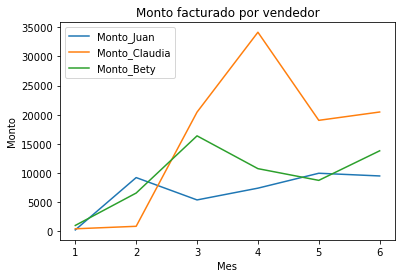

In [76]:
df_vend_line.plot(kind='line')

plt.title('Monto facturado por vendedor')
plt.ylabel('Monto')
plt.xlabel('Mes')

plt.show()

#### Lo mismo pero con % de utilidad y comparar utilidad con la facturación generada

In [77]:
df_vend_line2=df_vend[['Mes','Utilidad_Juan', 'Utilidad_Claudia','Utilidad_Bety']]

In [78]:
df_vend_line2=df_vend_line2.set_index('Mes')

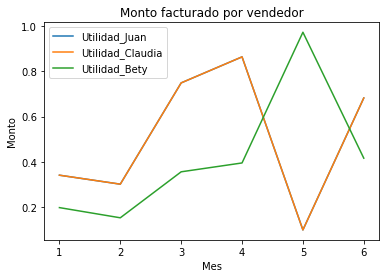

In [79]:
df_vend_line2.plot(kind='line')

plt.title('Monto facturado por vendedor')
plt.ylabel('Monto')
plt.xlabel('Mes')

plt.show()